In [ ]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

# Define BASE_DIR and adjust sys.path before importing
BASE_DIR = Path(os.getcwd()).parent  # Points to stat_656_autotrader/ from Notebooks/
sys.path.append(str(BASE_DIR))
print(f"Project root added to sys.path: {BASE_DIR}")

from src.visualizations.exploratory_plots import ax_smoothed_prices, ax_residuals, ax_log_difference, ax_arima_forecast


Project root added to sys.path: d:\dev\stat_656_autotrader


## Smoothing the Stock Price and Checking for Level Shifts

Connecting to database: D:\dev\stat_656_autotrader\databases\assets.db
Querying MCD prices for last 90 trading days from 2024-12-04 to 2025-04-15
Fetched 90 price records for MCD


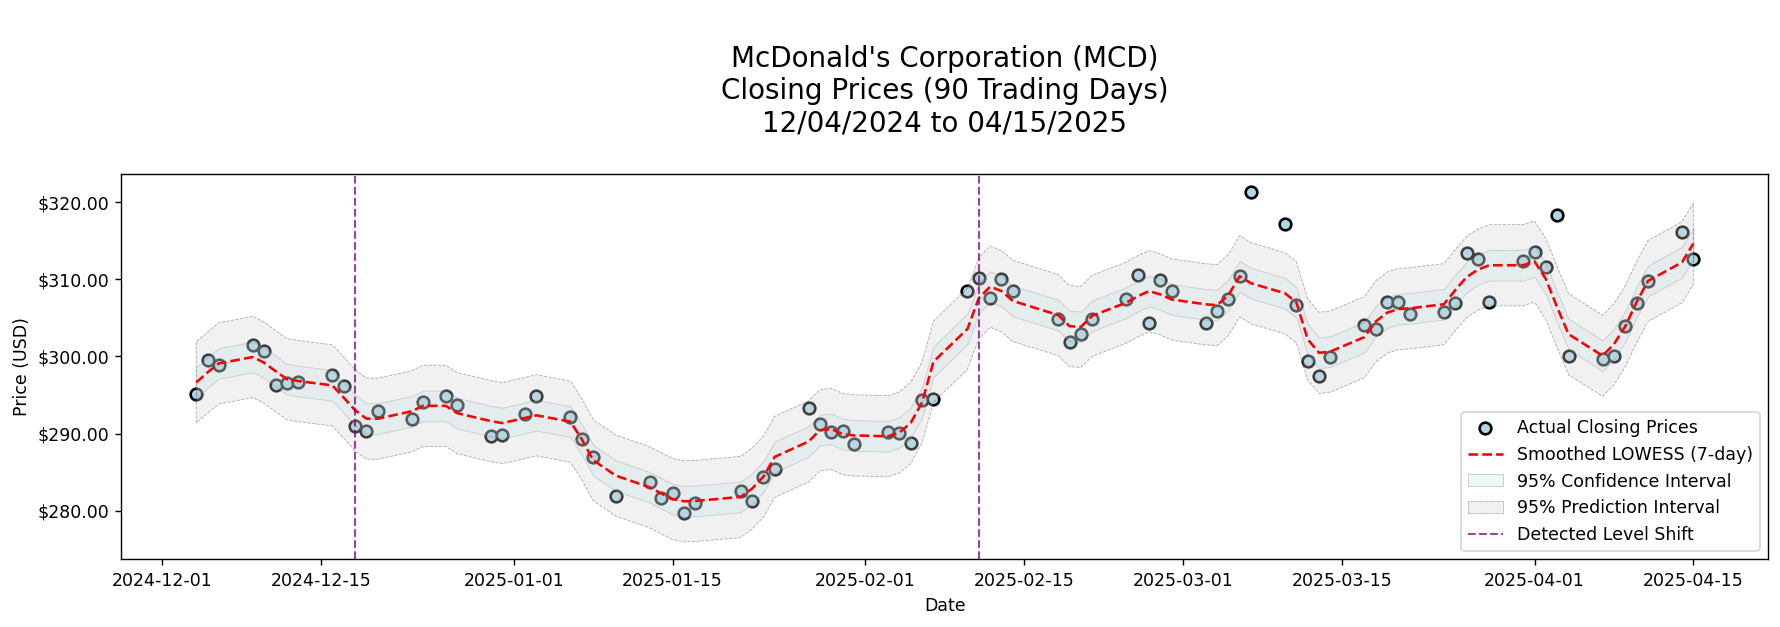

In [2]:
ax_smoothed_prices(
    symbol='MCD',
    days_back=90,
    smoothing_window=7,
    smoother="lowess",
    price_type="close",
    level_shifts_model="rbf",
    level_shifts_penalty=4,
    level_shifts_min_size=3,
    show_grid=False, 
    figsize=(17, 4), #(width, height) in inches
    dpi=125
    )

plt.show()

# Checking the Residuals of the Smoothed Prices

Connecting to database: D:\dev\stat_656_autotrader\databases\assets.db
Querying MCD prices for last 90 trading days from 2024-12-04 to 2025-04-15
Fetched 90 price records for MCD


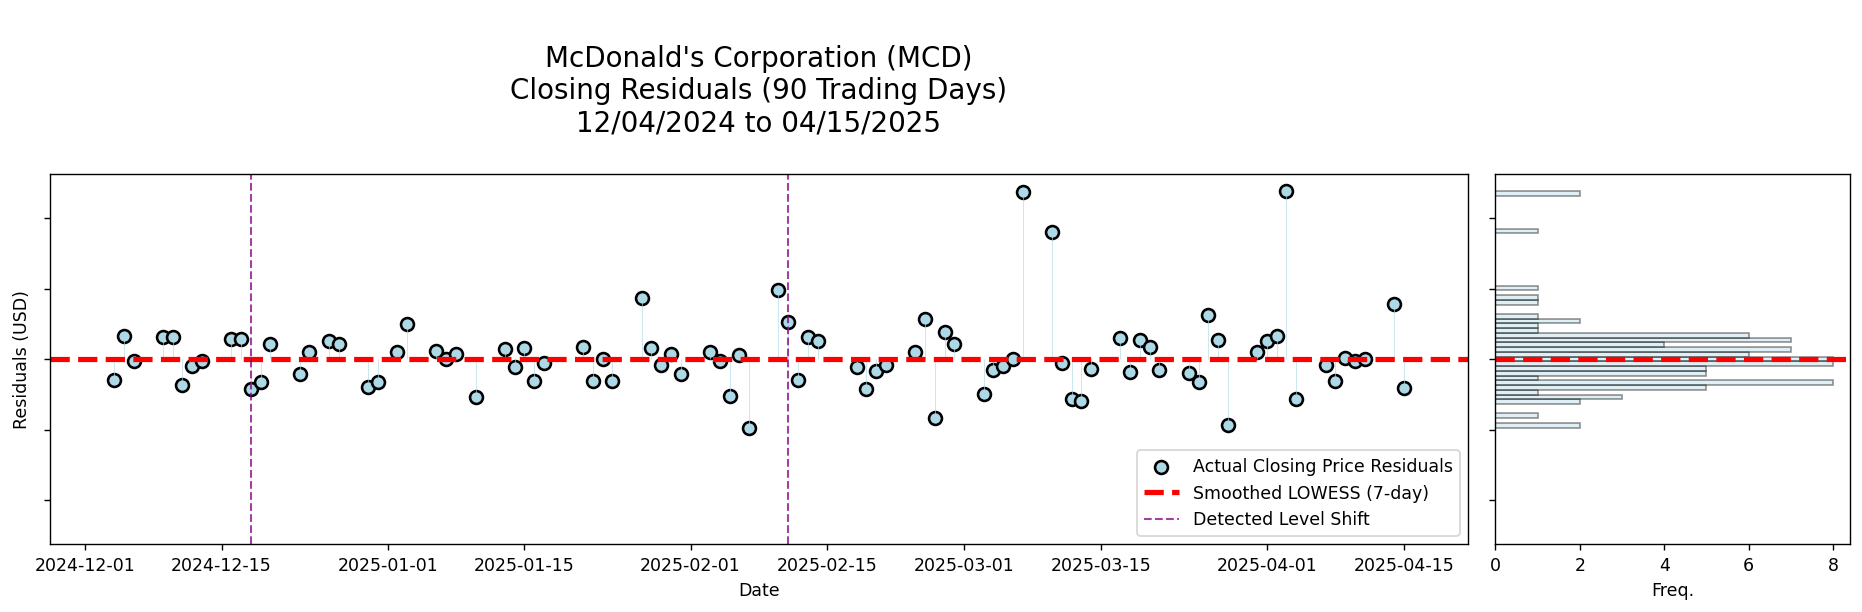

In [3]:
ax_residuals(
    symbol='MCD',
    days_back=90,
    smoothing_window=7,
    smoother="lowess",
    price_type="close",
    level_shifts_model="rbf",
    level_shifts_penalty=4,
    level_shifts_min_size=3,
    show_grid=False,
    figsize=(15, 5), #(width, height) in inches
    dpi=125
)

plt.show()

# Log-Difference the Data and Check For Normality

Connecting to database: D:\dev\stat_656_autotrader\databases\assets.db
Querying MCD prices for last 90 trading days from 2024-12-04 to 2025-04-15
Fetched 90 price records for MCD


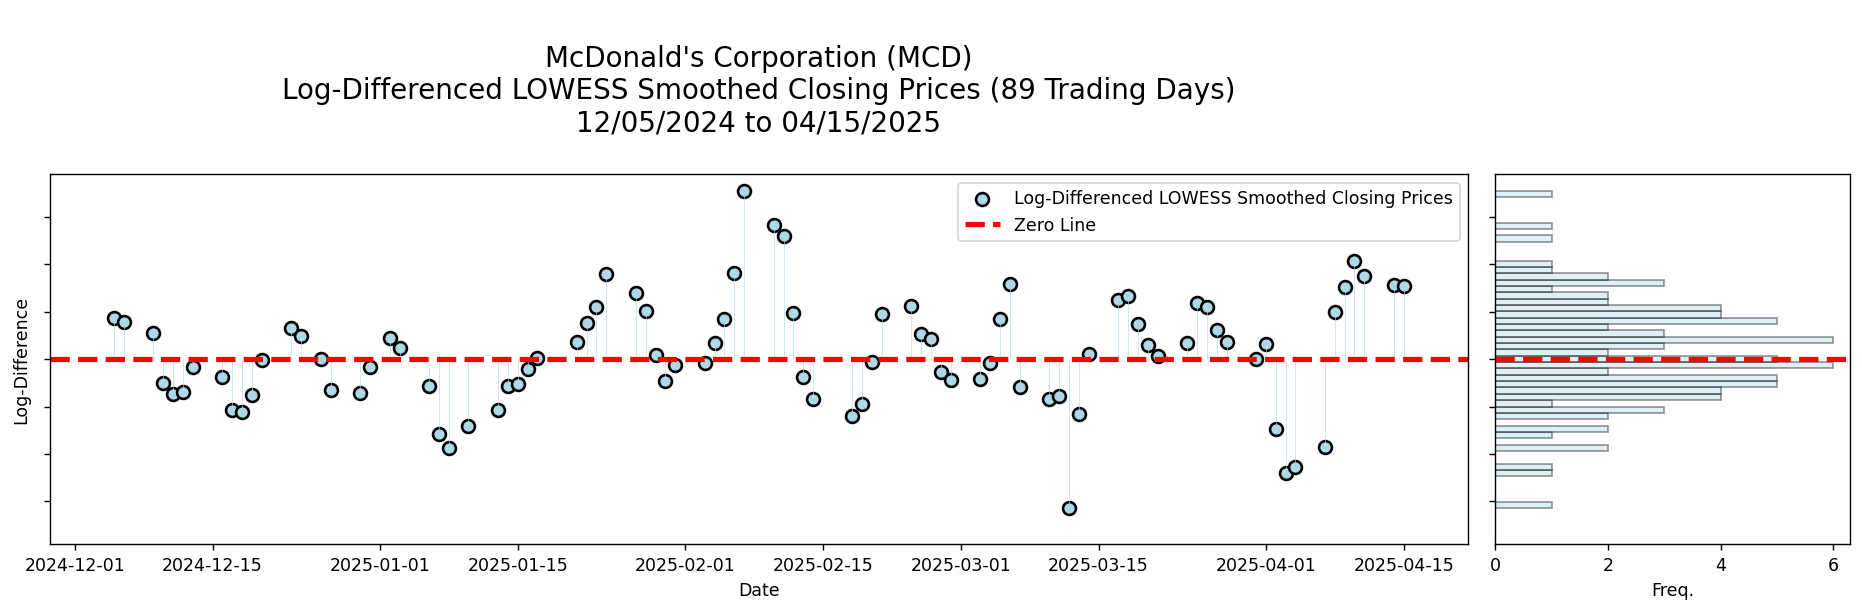

In [4]:
ax_log_difference(
    symbol='MCD',
    days_back=90,
    smoothing_window=7,
    smoother="lowess",
    price_type="close",
    level_shifts_model=None,
    show_grid=False,
    figsize=(15, 5), #(width, height) in inches
    dpi=125
)
plt.show()

In [ ]:
ax_arima_forecast(
    symbol='MCD',
    days_back=90,
    test_size=5,
    forecast_horizon=5,
    smoothing_window=7,
    smoother="lowess",
    price_type="close",
    exog_price_type="open",
    level_shifts_model="rbf",
    level_shifts_penalty=4,
    level_shifts_min_size=3,
    show_grid=False,
    figsize=(17, 7),
    dpi=125
)
plt.show()